# Importing kaggle api key

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bankusaha","key":"1a6eff5abbf65ee820118b6d14cdfede"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 60% 9.00M/15.1M [00:00<00:00, 92.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 120MB/s] 


In [4]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

In [5]:
import os
os.listdir('brain_tumor_dataset')

['no', 'yes']

In [6]:
from sklearn.model_selection import train_test_split
import shutil

# Plotting sample image

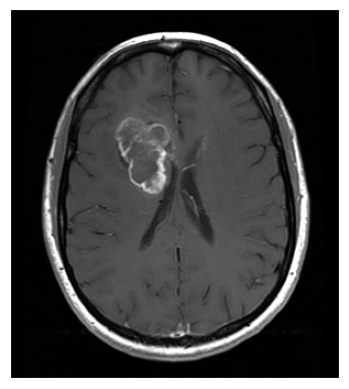

In [7]:
import matplotlib.pyplot as plt
import cv2

image_path = "/content/brain_tumor_dataset/yes/Y101.jpg"
img = cv2.imread(image_path)

if img is not None:
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis("off")
  plt.show()
else:
  print("Image doesnot exist")


# Splitting the images into training, validation and testing

In [8]:
no_tumor = "/content/brain_tumor_dataset/no"
yes_tumor = "/content/brain_tumor_dataset/yes"

no_tumor_images = [os.path.join(no_tumor,img) for img in os.listdir(no_tumor)]
yes_tumor_images = [os.path.join(yes_tumor,img) for img in os.listdir(yes_tumor)]

no_tumor_label = [0] * len(no_tumor_images)
yes_tumor_label = [1] * len(yes_tumor_images)

total_images = no_tumor_images + yes_tumor_images
total_labels = no_tumor_label + yes_tumor_label

X_train,X_temp,y_train,y_temp = train_test_split(total_images,total_labels,test_size = 0.3,stratify=total_labels,random_state = 20)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size = 0.7,stratify=y_temp,random_state = 20)

output_dir = {
    "train" : "/content/brain_tumor_dataset/train",
    "val" :  "/content/brain_tumor_dataset/val",
    "test" : "/content/brain_tumor_dataset/test"
}

for split in output_dir:
  os.makedirs(os.path.join(output_dir[split],"yes_tumor"),exist_ok=True)
  os.makedirs(os.path.join(output_dir[split],"no_tumor"),exist_ok = True)

def copy_images(image_paths, labels, split):
    for img_path, label in zip(image_paths, labels):
        category = "yes_tumor" if label == 1 else "no_tumor"
        dest_path = os.path.join(output_dir[split], category, os.path.basename(img_path))
        shutil.copy(img_path, dest_path)

copy_images(X_train,y_train,"train")
copy_images(X_val,y_val,"val")
copy_images(X_test,y_test,"test")

print("Dataset is successfully saved!")

Dataset is successfully saved!


In [9]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00


In [10]:
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

# Transforming the dataset

In [11]:
img_size = (224,224)
batch_size = 32

transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])
])

In [12]:
train_dataset = datasets.ImageFolder("/content/brain_tumor_dataset/train", transform=transform) # Access the correct training directory
val_dataset = datasets.ImageFolder("/content/brain_tumor_dataset/val", transform=transform)  # Access the correct validation directory
test_dataset = datasets.ImageFolder("/content/brain_tumor_dataset/test", transform=transform) # Access the correct testing directory

In [13]:
train_loader = DataLoader(train_dataset,batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_dataset,batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_dataset,batch_size = batch_size, shuffle = False)

In [14]:
image,label = next(iter(train_loader))
print(image.shape)

torch.Size([32, 3, 224, 224])


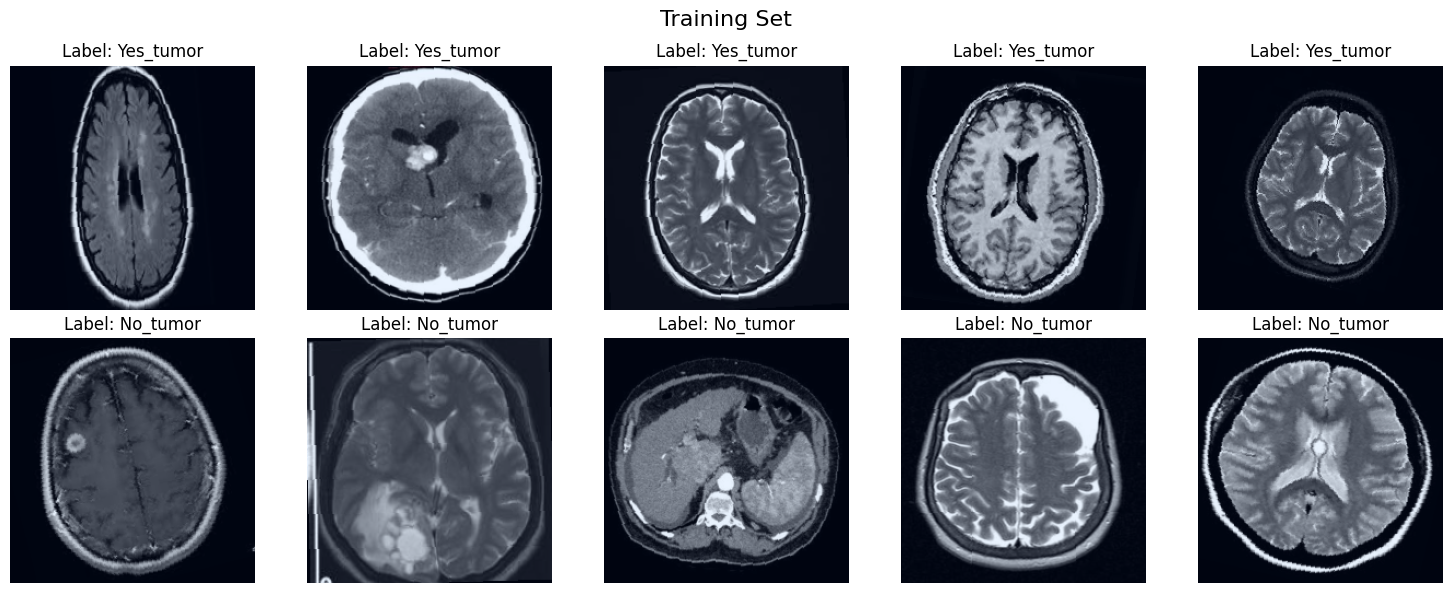

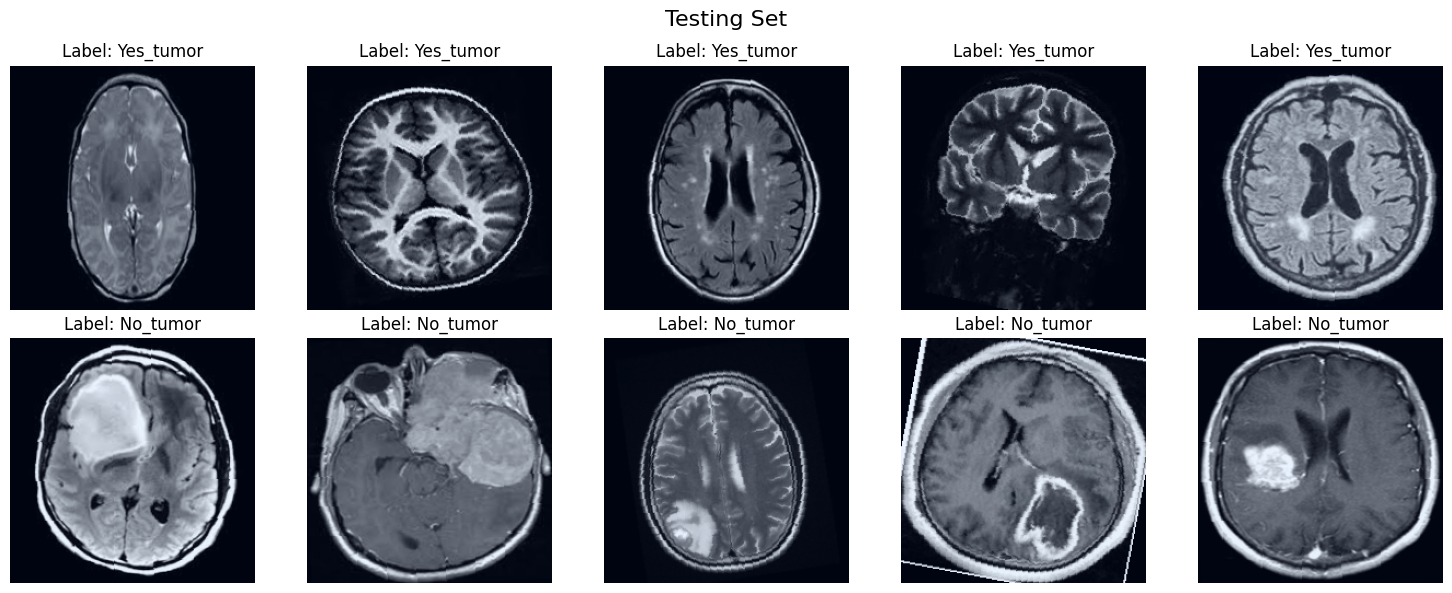

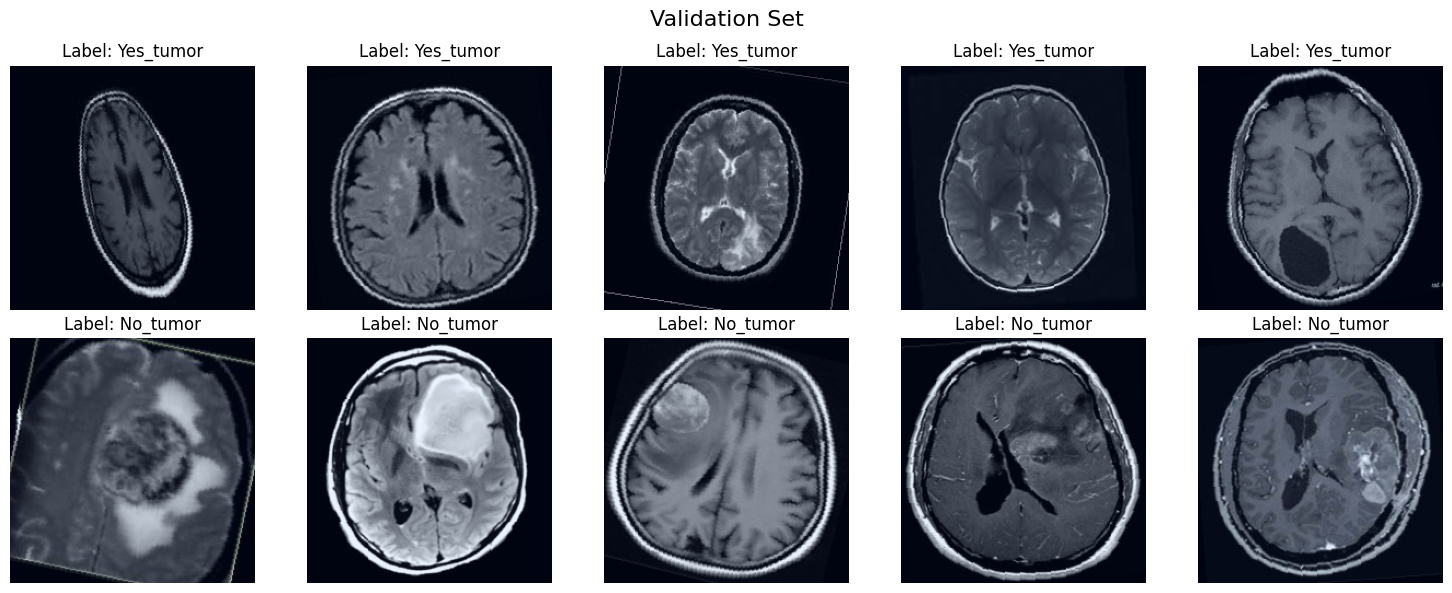

In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

def plot_balanced_images(dataloader, class_names, title, num_per_class=5):
    images_collected = {class_name: [] for class_name in class_names}

    for images, labels in dataloader:
        labels = labels.numpy()

        for img, label in zip(images, labels):
            class_name = class_names[label]
            if len(images_collected[class_name]) < num_per_class:
                images_collected[class_name].append(img)

        if all(len(images_collected[class_name]) >= num_per_class for class_name in class_names):
            break

    selected_images = []
    labels = []
    for class_name in class_names:
        selected_images.extend(images_collected[class_name][:num_per_class])
        labels.extend([class_name.capitalize()] * num_per_class)

    num_rows = 2 if num_per_class > 1 else 1
    fig, axes = plt.subplots(num_rows, num_per_class, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, (img, label) in enumerate(zip(selected_images, labels)):
        ax = axes[i // num_per_class, i % num_per_class]
        img = img.permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Label: {label}")

    plt.tight_layout()
    plt.show()

class_names = ["yes_tumor", "no_tumor"]

plot_balanced_images(train_loader, class_names, "Training Set")
plot_balanced_images(test_loader, class_names, "Testing Set")
plot_balanced_images(val_loader, class_names, "Validation Set")


In [16]:
import torch
import torch.nn as nn

In [17]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 16.7 MB/s eta 0:00:00


# Training The model(Using Mobile-Net)

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
import torchvision.models as models
import copy

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float('inf')
        self.counter = 0

    def check_early_stop(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        return self.counter >= self.patience

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100, patience=5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    early_stopping = EarlyStopping(patience=patience)
    best_val_loss = float('inf')
    best_model_state = None

    accuracy_metric = torchmetrics.classification.Accuracy(task="multiclass", num_classes=2).to(device)
    f1_metric = torchmetrics.classification.F1Score(task="multiclass", num_classes=2).to(device)
    recall_metric = torchmetrics.classification.Recall(task="multiclass", num_classes=2).to(device)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_accuracy = 0.0
        train_f1 = 0.0
        train_recall = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_accuracy += accuracy_metric(outputs, labels)
            train_f1 += f1_metric(outputs, labels)
            train_recall += recall_metric(outputs, labels)

        train_loss /= len(train_loader)
        train_accuracy /= len(train_loader)
        train_f1 /= len(train_loader)
        train_recall /= len(train_loader)

        model.eval()
        val_loss = 0.0
        val_accuracy = 0.0
        val_f1 = 0.0
        val_recall = 0.0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                val_accuracy += accuracy_metric(outputs, labels)
                val_f1 += f1_metric(outputs, labels)
                val_recall += recall_metric(outputs, labels)

        val_loss /= len(val_loader)
        val_accuracy /= len(val_loader)
        val_f1 /= len(val_loader)
        val_recall /= len(val_loader)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
              f"Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}, Recall: {val_recall:.4f}")

        scheduler.step(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = copy.deepcopy(model.state_dict())
            torch.save(best_model_state, "best_model.pth")
            print("Model Saved!")

        if early_stopping.check_early_stop(val_loss):
            print(f"Early stopping triggered after {epoch + 1} epochs!")
            break

    model.load_state_dict(best_model_state)
    return model

model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.DEFAULT)

model.classifier[1] = nn.Linear(in_features=1280, out_features=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25, patience=5)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 44.3MB/s]


Epoch 1/25, Train Loss: 0.6024, Val Loss: 0.5384, Accuracy: 0.8182, F1 Score: 0.8182, Recall: 0.8182
Model Saved!
Epoch 2/25, Train Loss: 0.2929, Val Loss: 0.9327, Accuracy: 0.6364, F1 Score: 0.6364, Recall: 0.6364
Epoch 3/25, Train Loss: 0.1369, Val Loss: 1.6551, Accuracy: 0.5909, F1 Score: 0.5909, Recall: 0.5909
Epoch 4/25, Train Loss: 0.0907, Val Loss: 0.7152, Accuracy: 0.7273, F1 Score: 0.7273, Recall: 0.7273
Epoch 5/25, Train Loss: 0.1703, Val Loss: 0.7037, Accuracy: 0.8182, F1 Score: 0.8182, Recall: 0.8182
Epoch 6/25, Train Loss: 0.0705, Val Loss: 0.5694, Accuracy: 0.8182, F1 Score: 0.8182, Recall: 0.8182
Early stopping triggered after 6 epochs!


In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [20]:
!pip install torchmetrics

In [21]:
import torch.nn.functional as F
import torchmetrics
import copy

# Predicting the image

In [22]:
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def predict(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)

    predicted_class = torch.argmax(output, dim=1).item()

    class_labels = ["no_tumor" , "yes_tumor"]
    predicted_label = class_labels[predicted_class]

    print(f"Predicted Class Index: {predicted_class}, Label: {predicted_label}")
    return predicted_class, predicted_label

image_path = "/content/yes/Y13.jpg"
predict(image_path)


Predicted Class Index: 1, Label: yes_tumor


(1, 'yes_tumor')